# Análisis de datos exploratorio

## Cargar datos

In [ ]:
import pandas as pd
import numpy as np

In [2]:
try:
    df = pd.read_parquet("0.parquet")
except:
    print("Downloading dataset .....")
    !curl -L "https://huggingface.co/datasets/GonzaloA/fake_news/resolve/refs%2Fconvert%2Fparquet/default/train/0000.parquet" -o 0.parquet 

## Inspeccionar datos

In [3]:
df

,Unnamed: 0,title,text,label
0,0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0
1,1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0
2,2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1
3,3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0
4,4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0
...,...,...,...,...
24348,24348,EU Parliament chief asks Poland to ensure MEPs...,WARSAW (Reuters) - The president of the Europe...,1
24349,24349,Chemical weapons watchdog found sarin used in ...,AMSTERDAM/UNITED NATIONS (Reuters) - An inquir...,1
24350,24350,"Melissa Harris-Perry Is DONE With MSNBC, Pens...","As you may or may not know at this point, MSNB...",0
24351,24351,Trump's pick for Navy secretary withdraws,WASHINGTON (Reuters) - U.S. President Donald T...,1


# Visualizacion del Dataset

d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Codes\IA-Project\.env\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

Text(-12.430555555555555, 0.5, 'Conteo')

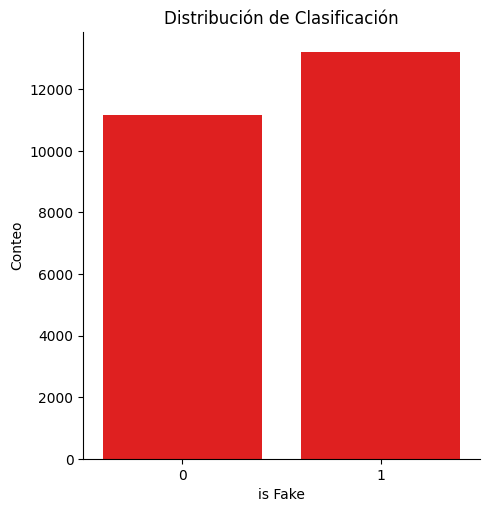

In [5]:
## Librerias para graficación
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizamos si la data esta balanceada
sns.catplot(x="label", kind="count", color="r", data=df)
plt.title("Distribución de Clasificación")
plt.xlabel("is Fake")
plt.ylabel("Conteo")

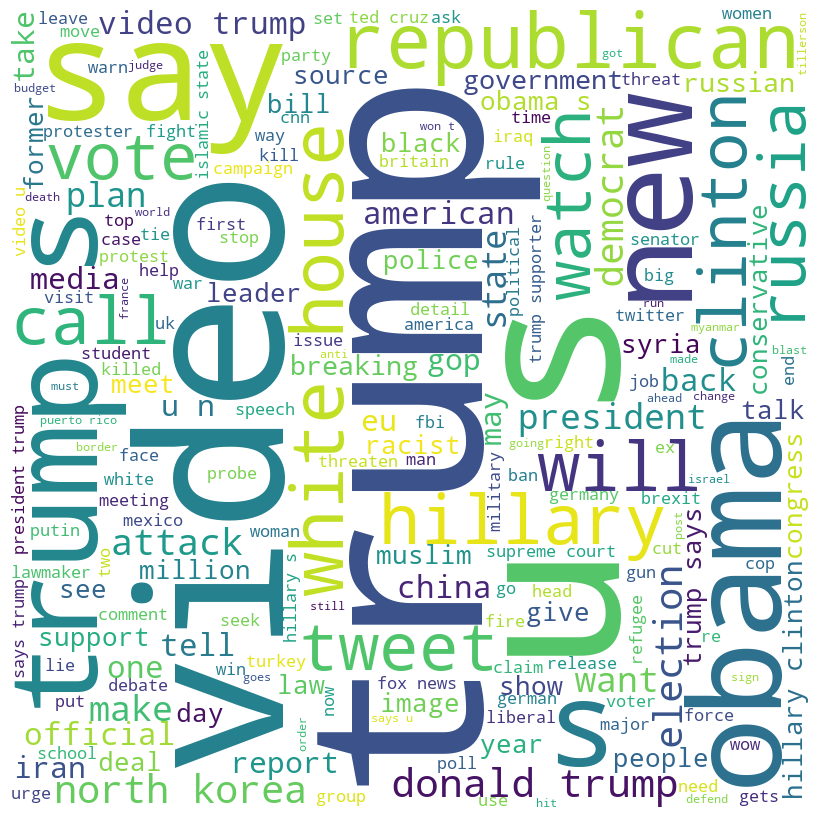

In [42]:
# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS

comment_words = ""
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df["title"]:
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens) + " "

wordcloud = WordCloud(
    width=800,
    height=800,
    background_color="white",
    stopwords=stopwords,
    min_font_size=10,
).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Pre-Procesado de los datos para NLP

## Preparación De Los Datos

In [6]:
import re        # Libreria para expresiones regulares
import gensim    # Libreria para el pre-procesamiento de lenguaje natural
import gensim.downloader
import nltk
from nltk.corpus import stopwords
stemmer = nltk.stem.SnowballStemmer('english')
nltk.download('stopwords')

In [8]:
# Eliminamos columnas innecesarias para el entramiento del modelo
df.drop(["Unnamed: 0"], axis=1, inplace=True)
df['features'] = df['title']+df['text']
df.head(5)

,title,text,label,features
0,‘Maury’ Show Official Facebook Posts F*CKED U...,Maury is perhaps one of the trashiest shows on...,0,‘Maury’ Show Official Facebook Posts F*CKED U...
1,Trump’s Favorite News Channel Tries To Soothe...,"Yesterday, after the father of one of the UCLA...",0,Trump’s Favorite News Channel Tries To Soothe...
2,"Russia warns Iraq, Kurds not to destabilize Mi...",MOSCOW (Reuters) - Russia on Wednesday warned ...,1,"Russia warns Iraq, Kurds not to destabilize Mi..."
3,WATCH STEVE SCALISE Throw A Strike At The Nati...,"House Majority Whip Steve Scalise (R., La.) th...",0,WATCH STEVE SCALISE Throw A Strike At The Nati...
4,Trump Will HATE What Stephen Colbert Just Did...,It can be said that Late Show host Stephen Col...,0,Trump Will HATE What Stephen Colbert Just Did...


In [7]:
# Funcion para procesar y limpiar el texto
def processing_text(texto):
    # Paso 1: Remover con un expresión regular carateres especiales (no palabras).
    processed_feature = re.sub(r'\W', ' ', str(texto))
    # Paso 2: Remover ocurrencias de caracteres individuales
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
    # Paso 3: Remover números (Ocurrencias muy esporádicas en nuestro dataset)
    processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)
    # Paso 4: Simplificar espacios concecutivos a un único espacio entre palabras
    processed_feature = re.sub(' +', ' ', processed_feature)
    # Paso 5: Pasar todo el texto a minúsculas
    processed_feature = processed_feature.lower()
    # Paso 6: Aplicar stemming. Es una forma de enviar las palabras a una raiz común simplificando de esta manera el vocabulario.
    # processed_feature = " ".join([stemmer.stem(i) for i in processed_feature.split()])
    return processed_feature

## Creating the representation of the text (Word2Vec, Keras Embedding, BOW)

In [36]:
from sklearn.model_selection import train_test_split
from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [39]:
def padding_2d(train: list):
    X_train_vect_avg = []
    for v in train:
        if v.size:
            X_train_vect_avg.append(v.mean(axis=0))
        else:
            X_train_vect_avg.append(np.zeros(100, dtype=float))
    return X_train_vect_avg

def padding(x_train: list, y_train: list, method: str="3d", max_length:int =100) -> tuple:
    if method == "3d":
        x = pad_sequences(x_train, maxlen=max_length, padding="post")
        y = pad_sequences(y_train, maxlen=max_length, padding="post")
    else:
        x = padding_2d(x_train)
        y = padding_2d(y_train)
    return (x, y)

In [10]:
def create_representation(representation: str, df: object):
    if representation == "word2vec":
        try:
            # Read the 'word2vec-google-news-300'
            word2vec = KeyedVectors.load("word2vec.model")
        except Exception as e:
            # Download the 'word2vec-google-news-300'
            print(f"Error {e}")
            print("Generating model word2vec")
            word2vec = gensim.downloader.load("word2vec-google-news-300")
            word2vec.save("word2vec.model")
            words = set(word2vec.index_to_key)
            X_train, X_test, y_train, y_test = train_test_split(df['features'], df['label'] , test_size=0.2)
            X_train = [
                np.array([word2vec[i] for i in ls if i in words]) for ls in X_train
            ]
            X_test = [
                np.array([word2vec[i] for i in ls if i in words]) for ls in X_test
            ]
            X_train, X_test = padding(X_train,X_test,"2d")
    elif representation == "keras":
        # Transformar las etiquetas categóricas en valores numéricos
        max_words = 10000
        max_sequence_length = 100

        tokenizer = Tokenizer(num_words=max_words)
        tokenizer.fit_on_texts(df["features"])
        X_sequences = tokenizer.texts_to_sequences(df["features"])
        X_padded = pad_sequences(X_sequences, maxlen=max_sequence_length)
        X_train, X_test, y_train, y_test = train_test_split(
            X_padded, df['label'], test_size=0.2, random_state=42
        )
    else:
        # El texto ya procesado de cada ejemplo en nuestro dataset lo almacenaremos en la variable "texto_procesado"
        texto_procesado = []
        for sentence in range(0, len(df['features'].values)):
            procesado = processing_text(df['features'].values[sentence])
            texto_procesado.append(procesado)
        # Bolsa de palabras
        # Construimos el vocabulario y tambien transformamos el texto
        texto_features = vectorizer.fit_transform(texto_procesado).toarray().astype("float16")
        vectorizer = CountVectorizer(max_features=1000, stop_words=stopwords.words('english'))
        # Partición del dataset: Seleccionar 80% para entrenamiento, 20% pruebas.
        X_train, X_test, y_train, y_test = train_test_split(texto_features, df['label'].values, test_size=0.2, random_state=0)
    return (X_train, X_test, y_train, y_test)
    

In [ ]:
X_train, X_test, y_train, y_test = create_representation("keras", df)

# Modelating

## Redes Neuronales 

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Flatten 
from tensorflow.keras.layers import Embedding, LSTM

In [37]:
# Construir y entrenar la red neuronal
model = Sequential()
embedding_dim = 100
max_words = 10000
max_sequence_length = 100
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_sequence_length))
model.add(Dense(200, activation='relu'))  # 100 es la dimensión de los vectores de Word2Vec
model.add(Dense(100, activation='relu'))  # 100 es la dimensión de los vectores de Word2Vec
model.add(Dense(25, activation='relu'))  # 100 es la dimensión de los vectores de Word2Vec
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))  # Capa de salida para la clasificación binaria

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense_24 (Dense)            (None, 200)               25800     
                                                                 
 dense_25 (Dense)            (None, 100)               20100     
                                                                 
 dense_26 (Dense)            (None, 25)                2525      
                                                                 
 dense_27 (Dense)            (None, 1)                 26        
                                                                 
Total params: 1165699 (4.45 MB)
Trainable params: 1165

In [38]:
history = model.fit(
    np.array(X_train),
    y_train,
    epochs=50,
    batch_size=64,
    verbose=True,
    validation_data=(np.array(X_test), y_test),
    workers=2,
)

Epoch 1/50


305/305 [==============================] - 47s 147ms/step - loss: 0.6858 - accuracy: 0.5419 - val_loss: 0.6815 - val_accuracy: 0.5385
Epoch 2/50
305/305 [==============================] - 45s 146ms/step - loss: 0.6769 - accuracy: 0.5427 - val_loss: 0.6714 - val_accuracy: 0.5385
Epoch 3/50
305/305 [==============================] - 48s 156ms/step - loss: 0.6620 - accuracy: 0.5873 - val_loss: 0.6491 - val_accuracy: 0.6190
Epoch 4/50
305/305 [==============================] - 48s 157ms/step - loss: 0.6280 - accuracy: 0.7058 - val_loss: 0.5959 - val_accuracy: 0.7534
Epoch 5/50
305/305 [==============================] - 45s 147ms/step - loss: 0.5513 - accuracy: 0.7808 - val_loss: 0.4901 - val_accuracy: 0.8557
Epoch 6/50
305/305 [==============================] - 45s 149ms/step - loss: 0.4211 - accuracy: 0.8484 - val_loss: 0.3951 - val_accuracy: 0.8267
Epoch 7/50
305/305 [==============================] - 44s 145ms/step - loss: 0.3212 - accuracy: 0.8739 - val_loss: 0.5309 - val_accuracy: 0.6

## Evaluation

In [44]:
# Evaluar el modelo
loss, accuracy = model.evaluate(np.array(X_test), y_test)
print(f'Accuracy: {accuracy}')

153/153 [==============================] - 3s 22ms/step - loss: 0.1323 - accuracy: 0.9530
Accuracy: 0.9529870748519897


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

153/153 [==============================] - 3s 18ms/step


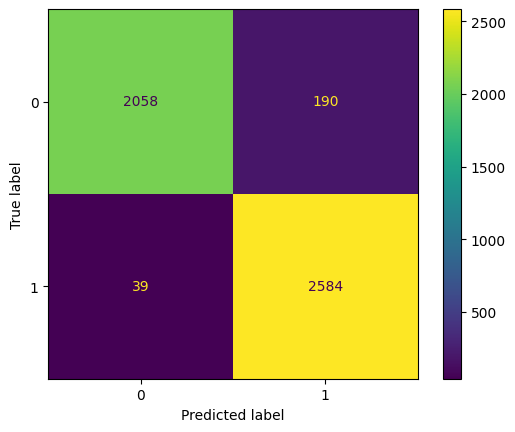

In [47]:
predictions = model.predict(np.array(X_test))
predictions = list(map(lambda x: 1 if (x > 0.5) else 0, predictions))

cm = confusion_matrix(y_test, predictions,labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

In [48]:
print(classification_report(y_test, list(predictions), digits=4))

              precision    recall  f1-score   support

           0     0.9814    0.9155    0.9473      2248
           1     0.9315    0.9851    0.9576      2623

    accuracy                         0.9530      4871
   macro avg     0.9565    0.9503    0.9524      4871
weighted avg     0.9545    0.9530    0.9528      4871



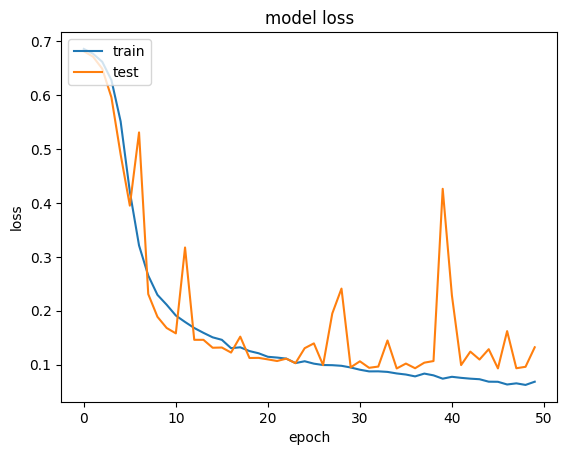

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()